 
## Coronavirus
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
import matplotlib.gridspec as gridspec

In [125]:
df = pd.read_csv("B:\\work\\2019_corona_virus.csv")

In [126]:
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [127]:
df.isnull().sum()

Sno                 0
Date                0
Province/State    418
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [128]:
len(df)

1569

In [129]:
df['Date'] = pd.to_datetime(df['Date'])
df['Last Update'] = pd.to_datetime(df['Last Update'])

In [130]:
df.tail(1)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1568,1569,2020-02-15 22:00:00,"Tempe, AZ",US,2020-02-01 19:43:03,1.0,0.0,0.0


In [131]:
df['Day']= df['Date'].dt.day
df['Month']= df['Date'].dt.month
df['Week']= df['Date'].dt.week
df['WeekDay']= df['Date'].dt.weekday

In [132]:
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Day,Month,Week,WeekDay
0,1,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0,22,1,4,2
1,2,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0,22,1,4,2
2,3,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0,22,1,4,2
3,4,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0,22,1,4,2
4,5,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,1,4,2


In [133]:
data= df.rename(columns = {'Province/State' : 'State'})

In [134]:
data.head(1)

,Sno,Date,State,Country,Last Update,Confirmed,Deaths,Recovered,Day,Month,Week,WeekDay
0,1,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0,22,1,4,2


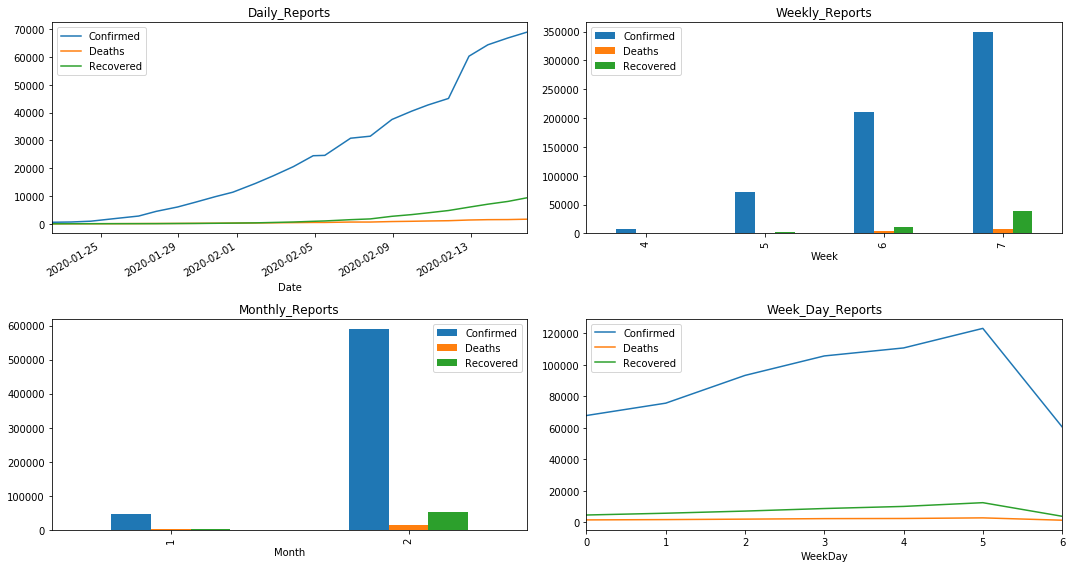

In [135]:
display_cols = ['Confirmed','Deaths', 'Recovered']
def multi_plot():
    fig = plt.figure(constrained_layout = True, figsize = (15,8))
    grid = gridspec.GridSpec(ncols = 4, nrows = 2, figure = fig)
    
    
            ## DAILY_REPORTS
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title("Daily_Reports")
    data.groupby(['Date']).sum()[display_cols].plot(ax = ax1)
    
        
           ## MONTHLY_REPORTS
    ax2 = fig.add_subplot(grid[1,:2])
    ax2.set_title('Monthly_Reports')
    data.groupby(['Month']).sum()[display_cols].plot(kind = 'bar', ax = ax2)
    
    
          ## WEEKLY_REPORTS
    ax3 = fig.add_subplot(grid[0,2:])
    ax3.set_title('Weekly_Reports')
    data.groupby(['Week']).sum()[display_cols].plot(kind = 'bar', ax = ax3)
    
    
    
         ##  WEEk_DAY_REPORTS
        
        
    ax4 = fig.add_subplot(grid[1,2:])
    ax4.set_title("Week_Day_Reports")
    data.groupby(['WeekDay']).sum()[display_cols].plot(ax= ax4)
    plt.tight_layout()
    
    
    
multi_plot()
    
    

### NOTE
- **Above graphs say that Day by Day the coronavirus effected person increases**
-  **More number of people recovered compare to death caused by Corona**

In [136]:
data['Country'].value_counts()

Mainland China          739
US                      166
Australia                76
Canada                   53
China                    34
South Korea              25
Japan                    25
Thailand                 25
Vietnam                  24
Macau                    24
Taiwan                   24
Singapore                24
Hong Kong                24
France                   23
Malaysia                 23
Nepal                    22
Sri Lanka                20
Germany                  20
Cambodia                 20
United Arab Emirates     18
Philippines              18
Finland                  18
India                    17
Italy                    17
UK                       16
Russia                   16
Sweden                   16
Spain                    16
Belgium                  12
Others                    9
Egypt                     2
Mexico                    1
Brazil                    1
Ivory Coast               1
Name: Country, dtype: int64

### NOTE
**Here two enteries are same i.e MainLand chaina and china so we can rename as china**

In [137]:
data['Country'].replace({'Mainland China'   : ' China'}, inplace = True)

In [138]:
data['Country'].value_counts()

 China                  739
US                      166
Australia                76
Canada                   53
China                    34
Thailand                 25
South Korea              25
Japan                    25
Vietnam                  24
Macau                    24
Taiwan                   24
Hong Kong                24
Singapore                24
Malaysia                 23
France                   23
Nepal                    22
Sri Lanka                20
Germany                  20
Cambodia                 20
United Arab Emirates     18
Philippines              18
Finland                  18
Italy                    17
India                    17
Russia                   16
Spain                    16
UK                       16
Sweden                   16
Belgium                  12
Others                    9
Egypt                     2
Mexico                    1
Brazil                    1
Ivory Coast               1
Name: Country, dtype: int64

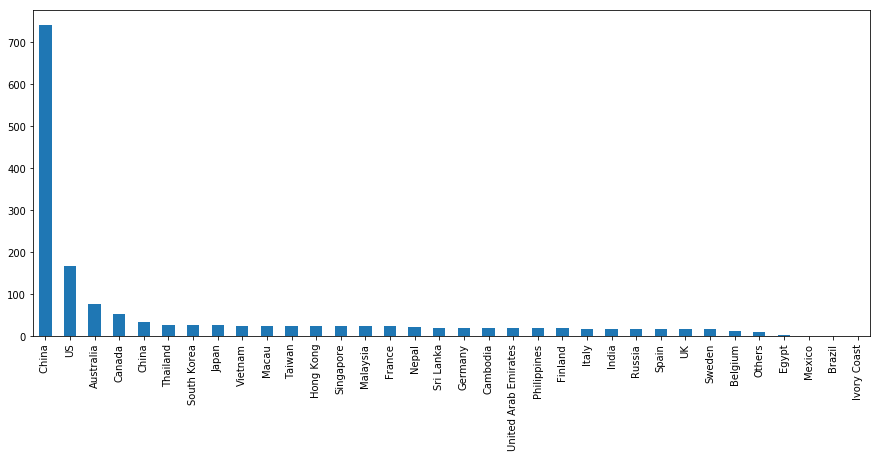

In [139]:
data['Country'].value_counts().plot(kind = 'bar', figsize = (15,6))

In [140]:
len(data[data['Date'] != data['Last Update']]['Country'].value_counts())

30

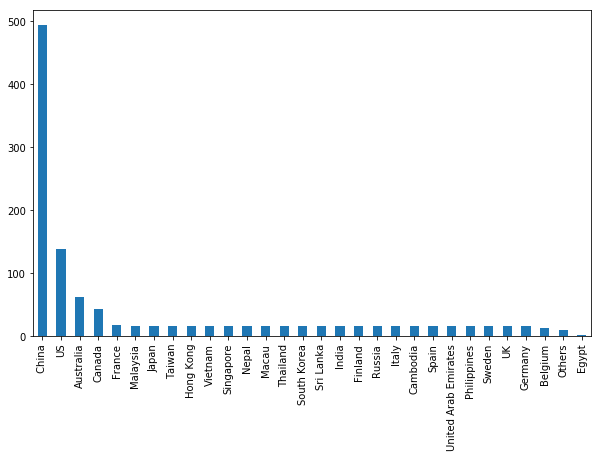

In [141]:
data[data['Date'] != data['Last Update']]['Country'].value_counts().plot(kind = 'bar', figsize = (10,6))

### NOTE
> **These are the countries (30) are not updated from  lastdate**

In [142]:
data['Last Update'].max()

Timestamp('2020-09-02 04:03:00')

**This is the lastupdate time**